In [9]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from api_util import read_token, BASE_URL, get_headers
import requests

def _make_get_request(endpoint, params=None, quiet=None):
    """共用的 HTTP GET 請求處理函數"""
    try:
        response = requests.get(f"{BASE_URL}/{endpoint}", headers=get_headers(read_token()), params=params)
        response.raise_for_status()
        result = response.json()
        if not quiet: 
            print(result)
        return result
    except requests.exceptions.RequestException as err:
        print(f"Request failed: {err}")
        return None
    
def _make_post_request(endpoint, data, quiet=None):
	try:
		response = requests.post(f"{BASE_URL}/{endpoint}", headers=get_headers(read_token()), json=data)
		response.raise_for_status()
		result = response.json()
		if not quiet: 
			print(result)
		return result
	except requests.exceptions.RequestException as err:
		print(f"Request failed: {err}")
		return None
            
def get_all_momentum():
    res = _make_get_request('market/momentum')
    return res.get('data')

def get_momentum_by_range(days):
    res = _make_get_request(f'market/momentum/range/{days}')
    return res.get('data')
    
def get_market_weights():
    res = _make_get_request('market/weights')
    return res.get('data')

def get_stock_symbols():
    res = _make_get_request('market/stock/symbols')
    return res.get('data')

def get_market_breadth():
    res = _make_get_request('market/stock/breadth')
    return res.get('data')

def get_stock_winners():
    res = _make_get_request('market/stock/winners')
    return res.get('data')

def get_stock_losers():
    res = _make_get_request('market/stock/losers')
    return res.get('data')

def get_statement_by_symbol(symbol):
    return _make_get_request(f"statements/{symbol}")


def draw_line_chart(x_data, y_data, label, title, xlabel, ylabel, interval=10, figsize=(10, 6), color='#efb441'):
    plt.figure(figsize=figsize)
    plt.plot(x_data, y_data, marker='', linestyle='-', color=color, label=label)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval))
    plt.gcf().autofmt_xdate()
    plt.grid(True)

    plt.legend()

    plt.tight_layout()
    plt.show()
    
def plot_pe_forward_vs_time(data):
    timestamps = []
    pe_forward_values = []
    
    for entry in data:
        created_at = entry.get('createdAt', '')
        pe_forward = entry.get('PE_Forward', None)
        
        if created_at and pe_forward is not None:
            timestamp = datetime.strptime(created_at, "%Y-%m-%dT%H:%M:%S.%fZ")
            timestamps.append(timestamp)
            
            pe_forward_values.append(float(pe_forward))
    
    draw_line_chart(timestamps, pe_forward_values, label='PE Forward', title='PE Forward vs Time', xlabel='Date', ylabel='PE Forward', figsize=(7, 5))
    



In [ ]:
res = get_market_weights()
res

In [ ]:
breadth = get_market_breadth()
breadth

In [8]:
# my_data = get_all_momentum()

my_data = get_momentum_by_range(7)
for i in range(7):
	print(my_data[i])

{'code': 200, 'message': '成功', 'data': [{'createdAt': '2025-06-20 17', 'volume': 0.49}, {'createdAt': '2025-06-20 18', 'volume': 0.53}, {'createdAt': '2025-06-20 20', 'volume': 0.24}, {'createdAt': '2025-06-20 21', 'volume': -3.24}, {'createdAt': '2025-06-21 01', 'volume': -19.53}, {'createdAt': '2025-06-21 04', 'volume': -2.33}, {'createdAt': '2025-06-21 06', 'volume': -2.14}, {'createdAt': '2025-06-21 07', 'volume': -1.54}, {'createdAt': '2025-06-21 08', 'volume': -1.12}, {'createdAt': '2025-06-21 10', 'volume': -0.72}, {'createdAt': '2025-06-21 11', 'volume': -0.32}, {'createdAt': '2025-06-21 12', 'volume': -0.42}, {'createdAt': '2025-06-21 14', 'volume': -0.12}, {'createdAt': '2025-06-21 15', 'volume': 0.66}, {'createdAt': '2025-06-21 16', 'volume': 0.59}, {'createdAt': '2025-06-21 19', 'volume': 2.21}, {'createdAt': '2025-06-21 20', 'volume': 1.51}, {'createdAt': '2025-06-21 21', 'volume': 0.87}, {'createdAt': '2025-06-21 22', 'volume': -0.59}, {'createdAt': '2025-06-21 23', 'volu

In [ ]:

import pandas as pd

df = pd.DataFrame(my_data)

df['createdAt'] = pd.to_datetime(df['createdAt'])
draw_line_chart(df['createdAt'], df['volume'], label='Momentum', title='Time Series Momentum', xlabel='Time', ylabel='Volume', interval=1)

In [ ]:
winners = get_stock_winners()
for stock in winners:
	print(stock.get('company'),'---', stock.get('dayChg'), '%')

In [ ]:
losers = get_stock_losers()
for stock in losers:
	print(stock.get('company'),'---', stock.get('dayChg'), '%')

{'code': 200, 'message': '成功', 'data': [{'id': 13, 'symbo': 'NVDA', 'price': '857.74', 'PE_Trailing': '71.86', 'PE_Forward': '29.02', 'EPS_Trailing': '11.94', 'EPS_Forward': '29.55', 'volume': 0, 'marketCap': '2144.35B', 'createdAt': '2024-03-12T19:22:36.000Z', 'updatedAt': '2024-03-12T19:22:36.000Z'}, {'id': 49, 'symbo': 'NVDA', 'price': '919.13', 'PE_Trailing': '77.00', 'PE_Forward': '31.10', 'EPS_Trailing': '11.94', 'EPS_Forward': '29.55', 'volume': 0, 'marketCap': '2297.83B', 'createdAt': '2024-03-13T20:16:36.000Z', 'updatedAt': '2024-03-13T20:16:36.000Z'}, {'id': 85, 'symbo': 'NVDA', 'price': '914.35', 'PE_Trailing': '78.99', 'PE_Forward': '31.56', 'EPS_Trailing': '11.94', 'EPS_Forward': '29.88', 'volume': 0, 'marketCap': '2357.23B', 'createdAt': '2024-03-24T18:16:36.000Z', 'updatedAt': '2024-03-24T18:16:36.000Z'}, {'id': 121, 'symbo': 'NVDA', 'price': '942.89', 'PE_Trailing': '78.99', 'PE_Forward': '31.56', 'EPS_Trailing': '11.94', 'EPS_Forward': '29.88', 'volume': 0, 'marketCap'

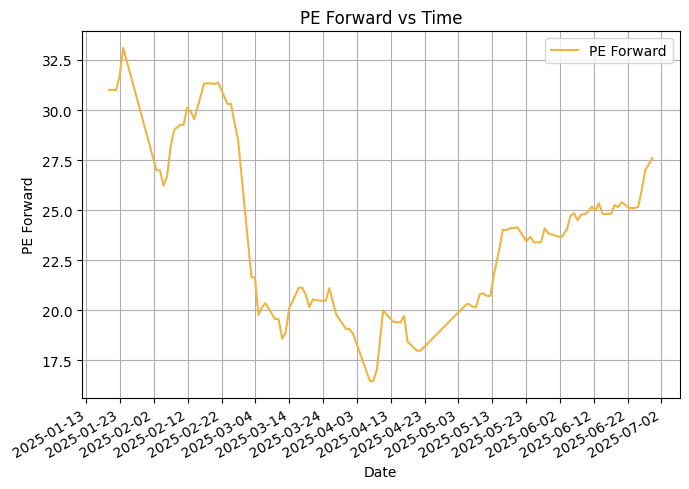

{'code': 200, 'message': '成功', 'data': [{'id': 14, 'symbo': 'GOOG', 'price': '138.94', 'PE_Trailing': '23.93', 'PE_Forward': '17.71', 'EPS_Trailing': '5.81', 'EPS_Forward': '7.85', 'volume': 0, 'marketCap': '1727.44B', 'createdAt': '2024-03-12T19:22:44.000Z', 'updatedAt': '2024-03-12T19:22:44.000Z'}, {'id': 50, 'symbo': 'GOOG', 'price': '139.62', 'PE_Trailing': '24.05', 'PE_Forward': '17.80', 'EPS_Trailing': '5.81', 'EPS_Forward': '7.85', 'volume': 0, 'marketCap': '1735.90B', 'createdAt': '2024-03-13T20:16:44.000Z', 'updatedAt': '2024-03-13T20:16:44.000Z'}, {'id': 86, 'symbo': 'GOOG', 'price': '148.74', 'PE_Trailing': '26.14', 'PE_Forward': '19.33', 'EPS_Trailing': '5.81', 'EPS_Forward': '7.85', 'volume': 0, 'marketCap': '1886.96B', 'createdAt': '2024-03-24T18:16:44.000Z', 'updatedAt': '2024-03-24T18:16:44.000Z'}, {'id': 122, 'symbo': 'GOOG', 'price': '151.77', 'PE_Trailing': '26.14', 'PE_Forward': '19.33', 'EPS_Trailing': '5.81', 'EPS_Forward': '7.85', 'volume': 0, 'marketCap': '1886.

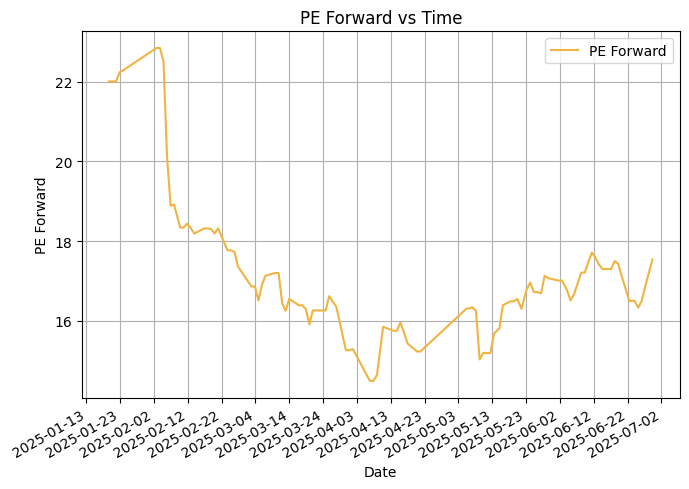

{'code': 200, 'message': '成功', 'data': [{'id': 36, 'symbo': 'META', 'price': '483.59', 'PE_Trailing': '32.46', 'PE_Forward': '20.85', 'EPS_Trailing': '14.90', 'EPS_Forward': '23.20', 'volume': 0, 'marketCap': '1232.87B', 'createdAt': '2024-03-12T19:25:40.000Z', 'updatedAt': '2024-03-12T19:25:40.000Z'}, {'id': 72, 'symbo': 'META', 'price': '499.75', 'PE_Trailing': '33.55', 'PE_Forward': '21.54', 'EPS_Trailing': '14.90', 'EPS_Forward': '23.20', 'volume': 0, 'marketCap': '1274.07B', 'createdAt': '2024-03-13T20:19:41.000Z', 'updatedAt': '2024-03-13T20:19:41.000Z'}, {'id': 108, 'symbo': 'META', 'price': '507.76', 'PE_Trailing': '34.21', 'PE_Forward': '21.97', 'EPS_Trailing': '14.90', 'EPS_Forward': '23.19', 'volume': 0, 'marketCap': '1299.13B', 'createdAt': '2024-03-24T18:19:40.000Z', 'updatedAt': '2024-03-24T18:19:40.000Z'}, {'id': 144, 'symbo': 'META', 'price': '509.58', 'PE_Trailing': '34.21', 'PE_Forward': '21.97', 'EPS_Trailing': '14.90', 'EPS_Forward': '23.19', 'volume': 0, 'marketCap

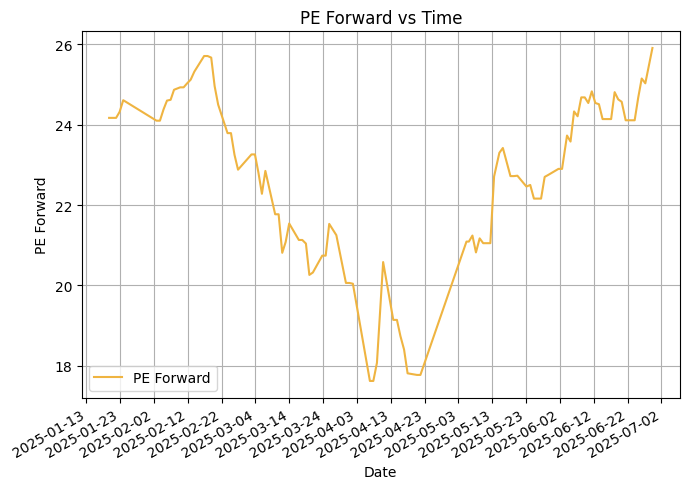

{'code': 200, 'message': '成功', 'data': [{'id': 18, 'symbo': 'AMZN', 'price': '171.96', 'PE_Trailing': '59.51', 'PE_Forward': '31.92', 'EPS_Trailing': '2.89', 'EPS_Forward': '5.39', 'volume': 0, 'marketCap': '1786.22B', 'createdAt': '2024-03-12T19:23:16.000Z', 'updatedAt': '2024-03-12T19:23:16.000Z'}, {'id': 54, 'symbo': 'AMZN', 'price': '175.39', 'PE_Trailing': '60.70', 'PE_Forward': '32.56', 'EPS_Trailing': '2.89', 'EPS_Forward': '5.39', 'volume': 0, 'marketCap': '1821.85B', 'createdAt': '2024-03-13T20:17:16.000Z', 'updatedAt': '2024-03-13T20:17:16.000Z'}, {'id': 90, 'symbo': 'AMZN', 'price': '178.15', 'PE_Trailing': '61.90', 'PE_Forward': '33.25', 'EPS_Trailing': '2.89', 'EPS_Forward': '5.38', 'volume': 0, 'marketCap': '1857.99B', 'createdAt': '2024-03-24T18:17:16.000Z', 'updatedAt': '2024-03-24T18:17:16.000Z'}, {'id': 126, 'symbo': 'AMZN', 'price': '178.87', 'PE_Trailing': '61.90', 'PE_Forward': '33.25', 'EPS_Trailing': '2.89', 'EPS_Forward': '5.38', 'volume': 0, 'marketCap': '1857.

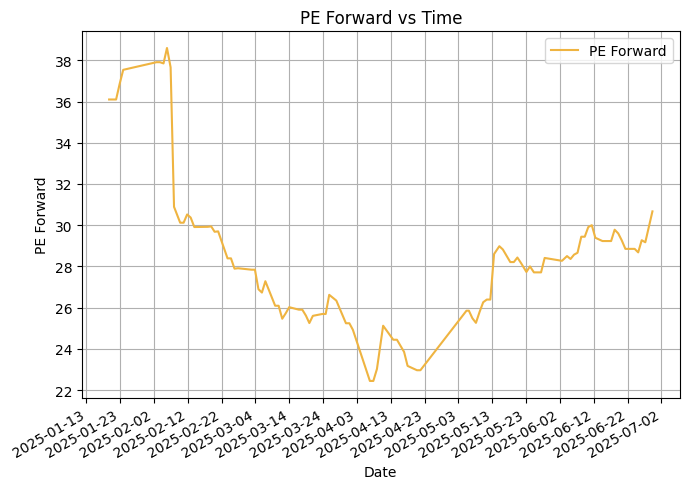

{'code': 200, 'message': '成功', 'data': [{'id': 23, 'symbo': 'TSLA', 'price': '177.77', 'PE_Trailing': '41.31', 'PE_Forward': '42.50', 'EPS_Trailing': '4.30', 'EPS_Forward': '4.18', 'volume': 0, 'marketCap': '566.16B', 'createdAt': '2024-03-12T19:23:56.000Z', 'updatedAt': '2024-03-12T19:23:56.000Z'}, {'id': 59, 'symbo': 'TSLA', 'price': '177.54', 'PE_Trailing': '41.26', 'PE_Forward': '42.45', 'EPS_Trailing': '4.30', 'EPS_Forward': '4.18', 'volume': 0, 'marketCap': '565.43B', 'createdAt': '2024-03-13T20:17:56.000Z', 'updatedAt': '2024-03-13T20:17:56.000Z'}, {'id': 95, 'symbo': 'TSLA', 'price': '172.82', 'PE_Trailing': '39.70', 'PE_Forward': '42.28', 'EPS_Trailing': '4.30', 'EPS_Forward': '4.04', 'volume': 0, 'marketCap': '544.06B', 'createdAt': '2024-03-24T18:17:56.000Z', 'updatedAt': '2024-03-24T18:17:56.000Z'}, {'id': 131, 'symbo': 'TSLA', 'price': '170.83', 'PE_Trailing': '39.70', 'PE_Forward': '42.28', 'EPS_Trailing': '4.30', 'EPS_Forward': '4.04', 'volume': 0, 'marketCap': '544.06B'

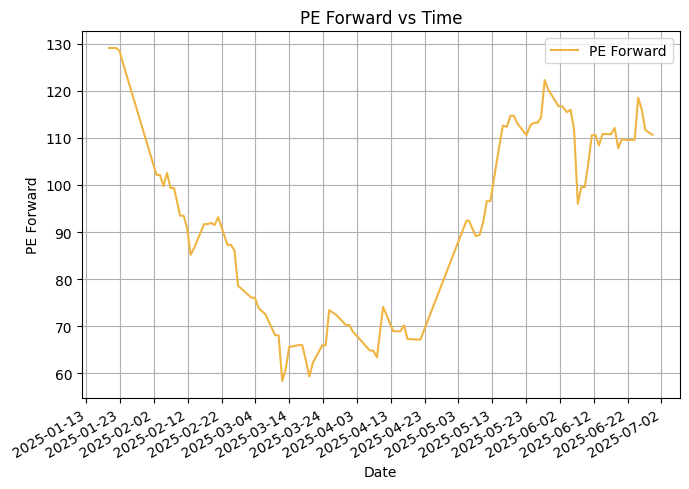

{'code': 200, 'message': '成功', 'data': [{'id': 15, 'symbo': 'MSFT', 'price': '404.52', 'PE_Trailing': '36.59', 'PE_Forward': '30.23', 'EPS_Trailing': '11.06', 'EPS_Forward': '13.38', 'volume': 0, 'marketCap': '3005.76B', 'createdAt': '2024-03-12T19:22:52.000Z', 'updatedAt': '2024-03-12T19:22:52.000Z'}, {'id': 51, 'symbo': 'MSFT', 'price': '415.28', 'PE_Trailing': '37.56', 'PE_Forward': '31.03', 'EPS_Trailing': '11.06', 'EPS_Forward': '13.38', 'volume': 0, 'marketCap': '3085.71B', 'createdAt': '2024-03-13T20:16:52.000Z', 'updatedAt': '2024-03-13T20:16:52.000Z'}, {'id': 87, 'symbo': 'MSFT', 'price': '429.37', 'PE_Trailing': '38.78', 'PE_Forward': '32.02', 'EPS_Trailing': '11.06', 'EPS_Forward': '13.39', 'volume': 0, 'marketCap': '3185.73B', 'createdAt': '2024-03-24T18:16:52.000Z', 'updatedAt': '2024-03-24T18:16:52.000Z'}, {'id': 123, 'symbo': 'MSFT', 'price': '428.74', 'PE_Trailing': '38.78', 'PE_Forward': '32.02', 'EPS_Trailing': '11.06', 'EPS_Forward': '13.39', 'volume': 0, 'marketCap'

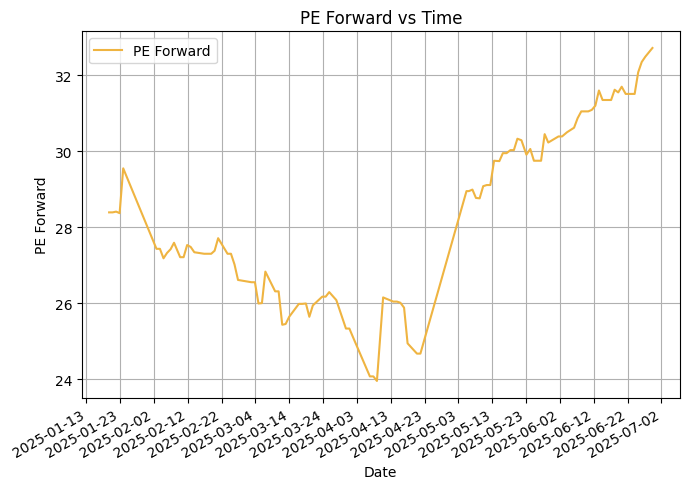

{'code': 200, 'message': '成功', 'data': [{'id': 10, 'symbo': 'CRWD', 'price': '317.37', 'PE_Trailing': '874.30', 'PE_Forward': '65.16', 'EPS_Trailing': '0.36', 'EPS_Forward': '4.87', 'volume': 0, 'marketCap': '76.20B', 'createdAt': '2024-03-12T19:22:12.000Z', 'updatedAt': '2024-03-12T19:22:12.000Z'}, {'id': 46, 'symbo': 'CRWD', 'price': '329.27', 'PE_Trailing': '907.08', 'PE_Forward': '67.60', 'EPS_Trailing': '0.36', 'EPS_Forward': '4.87', 'volume': 0, 'marketCap': '79.64B', 'createdAt': '2024-03-13T20:16:12.000Z', 'updatedAt': '2024-03-13T20:16:12.000Z'}, {'id': 82, 'symbo': 'CRWD', 'price': '329.46', 'PE_Trailing': '902.42', 'PE_Forward': '67.23', 'EPS_Trailing': '0.36', 'EPS_Forward': '4.87', 'volume': 0, 'marketCap': '79.23B', 'createdAt': '2024-03-24T18:16:12.000Z', 'updatedAt': '2024-03-24T18:16:12.000Z'}, {'id': 118, 'symbo': 'CRWD', 'price': '327.58', 'PE_Trailing': '902.42', 'PE_Forward': '67.23', 'EPS_Trailing': '0.36', 'EPS_Forward': '4.87', 'volume': 0, 'marketCap': '79.23B'

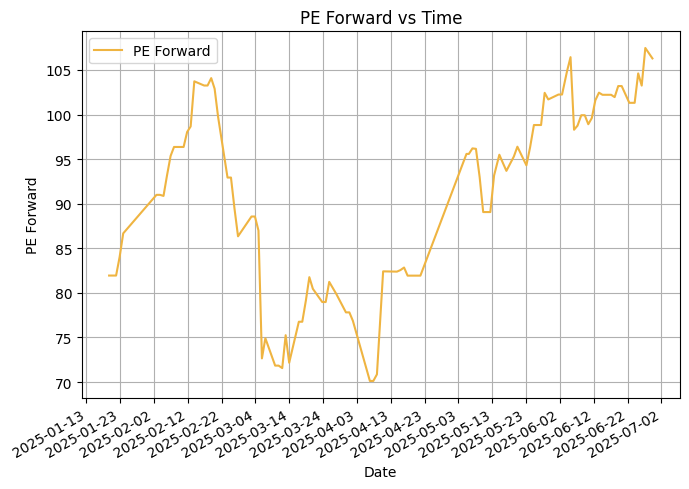

{'code': 200, 'message': '成功', 'data': [{'id': 16, 'symbo': 'PLTR', 'price': '25.35', 'PE_Trailing': '0.00', 'PE_Forward': '0.00', 'EPS_Trailing': '0.00', 'EPS_Forward': '0.00', 'volume': 0, 'marketCap': '', 'createdAt': '2024-03-12T19:23:00.000Z', 'updatedAt': '2024-03-12T19:23:00.000Z'}, {'id': 52, 'symbo': 'PLTR', 'price': '24.70', 'PE_Trailing': '0.00', 'PE_Forward': '0.00', 'EPS_Trailing': '0.00', 'EPS_Forward': '0.00', 'volume': 0, 'marketCap': '', 'createdAt': '2024-03-13T20:17:00.000Z', 'updatedAt': '2024-03-13T20:17:00.000Z'}, {'id': 88, 'symbo': 'PLTR', 'price': '24.49', 'PE_Trailing': '0.00', 'PE_Forward': '0.00', 'EPS_Trailing': '0.00', 'EPS_Forward': '0.00', 'volume': 0, 'marketCap': '', 'createdAt': '2024-03-24T18:17:00.000Z', 'updatedAt': '2024-03-24T18:17:00.000Z'}, {'id': 124, 'symbo': 'PLTR', 'price': '24.18', 'PE_Trailing': '0.00', 'PE_Forward': '0.00', 'EPS_Trailing': '0.00', 'EPS_Forward': '0.00', 'volume': 0, 'marketCap': '', 'createdAt': '2024-03-25T20:17:00.000Z

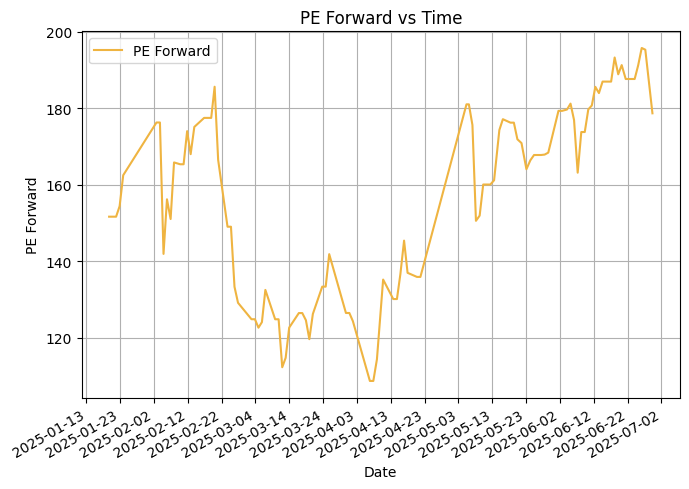

{'code': 200, 'message': '成功', 'data': [{'id': 31303, 'symbo': 'COIN', 'price': '204.93', 'PE_Trailing': '21.59', 'PE_Forward': '25.83', 'EPS_Trailing': '9.49', 'EPS_Forward': '7.93', 'volume': 19, 'marketCap': '52.19B', 'createdAt': '2025-05-05T09:20:06.000Z', 'updatedAt': '2025-05-05T09:20:06.000Z'}, {'id': 31426, 'symbo': 'COIN', 'price': '204.93', 'PE_Trailing': '21.59', 'PE_Forward': '25.83', 'EPS_Trailing': '9.49', 'EPS_Forward': '7.93', 'volume': 24, 'marketCap': '52.19B', 'createdAt': '2025-05-05T10:20:06.000Z', 'updatedAt': '2025-05-05T10:20:06.000Z'}, {'id': 31547, 'symbo': 'COIN', 'price': '204.93', 'PE_Trailing': '21.59', 'PE_Forward': '25.83', 'EPS_Trailing': '9.49', 'EPS_Forward': '7.93', 'volume': 77, 'marketCap': '52.19B', 'createdAt': '2025-05-05T12:18:01.000Z', 'updatedAt': '2025-05-05T12:18:01.000Z'}, {'id': 31583, 'symbo': 'COIN', 'price': '204.93', 'PE_Trailing': '21.59', 'PE_Forward': '25.83', 'EPS_Trailing': '9.49', 'EPS_Forward': '7.93', 'volume': 99, 'marketCap

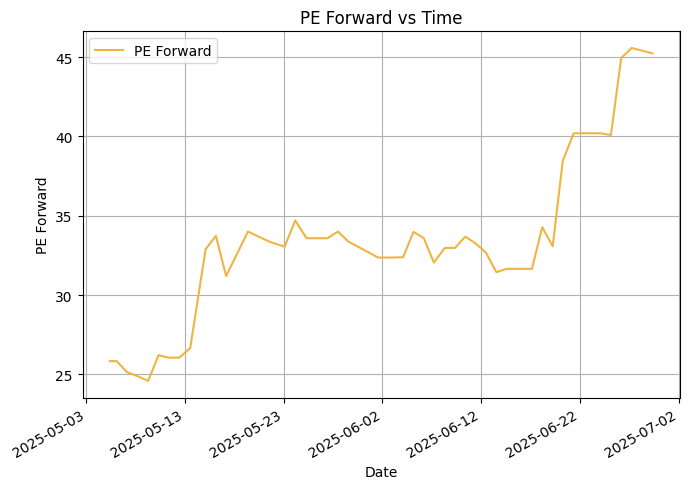

In [10]:
m7 = ['nvda', 'goog', 'meta', 'amzn', 'tsla', 'msft', 'crwd', 'pltr', 'coin']

for item in m7:
	res = get_statement_by_symbol(item)
	data = res.get('data')
	plot_pe_forward_vs_time(data[-500:])